#### Assignment 8 Clustering
#### Rania Siddiqui 07494
#### rs07494@st.habib.edu.pk

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
icecreamdf = pd.read_csv('baskin_robbins_icecream.csv')
icecreamdf.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [5]:
## Q1
X = icecreamdf.drop(['Flavour', 'Category'], axis=1)
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


In [6]:
X.tail()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
65,200,10.0,0.4,24,21,4.0
66,120,0.5,0.0,27,20,0.1
67,80,1.5,0.0,16,12,1.0
68,160,8.0,0.2,20,16,2.0
69,260,60.0,0.4,25,18,5.0


In [11]:
## Q2
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Q3
#Finding the optimum number of clusters for k-means clustering
wss = []
sil_scr_avg = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)
    sil_scr_avg.append(silhouette_score(XS, kmeans.labels_))

print(sil_scr_avg)

[0.45141141845881283, 0.41205000320842494, 0.3719561510866301, 0.3849604075937587, 0.42291691762240574, 0.4111477955098181, 0.3453116032998902, 0.33432099598739273, 0.34171240368291533, 0.33490263617876465, 0.31777921807280596, 0.33358692167578585, 0.32207928065620084]


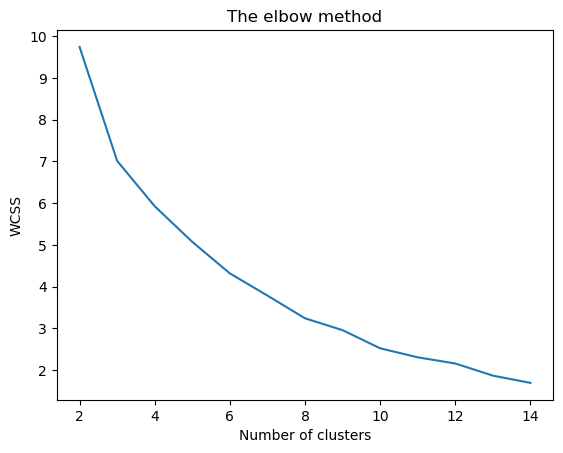

In [16]:
plt.plot(range(2, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#####  Based on the visualization provided, beyond k=3, the plot exhibits less pronounced changes and tends to flatten. This notable shift in Within-Cluster Sum of Squares (WCSS) suggests that the optimal number of clusters for k-means clustering is 3.

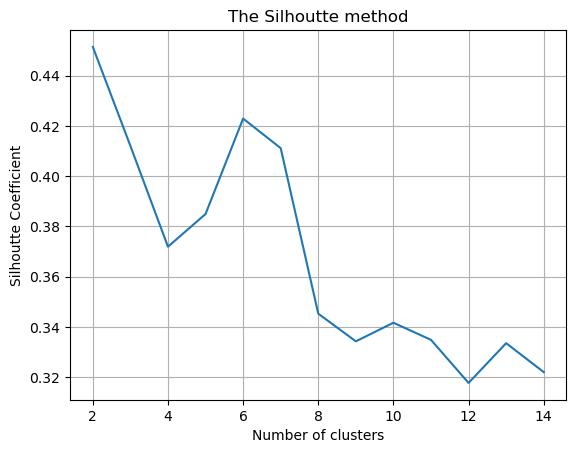

In [19]:
plt.plot(range(2, 15), sil_scr_avg)
plt.title('The Silhoutte method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.grid()
plt.show()

##### The Silhouette Average Plot further supports the determination of the number of clusters as 3, consistent with the finding from the Elbow Plot. This conclusion is drawn from the Silhouette Coefficient, which exhibits a value closest to 1 when the number of clusters is set to 3. Therefore, we will choose k = 3.

In [21]:
# Q4
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Res = kmeans.fit_predict(XS)

In [23]:
Res

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 0])

##### The provided array is the outcome of implementing k-means clustering on the given dataset with a value of k set to 3

In [25]:
#Q5
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.3583141783564117

### Plotting any two features for visualization

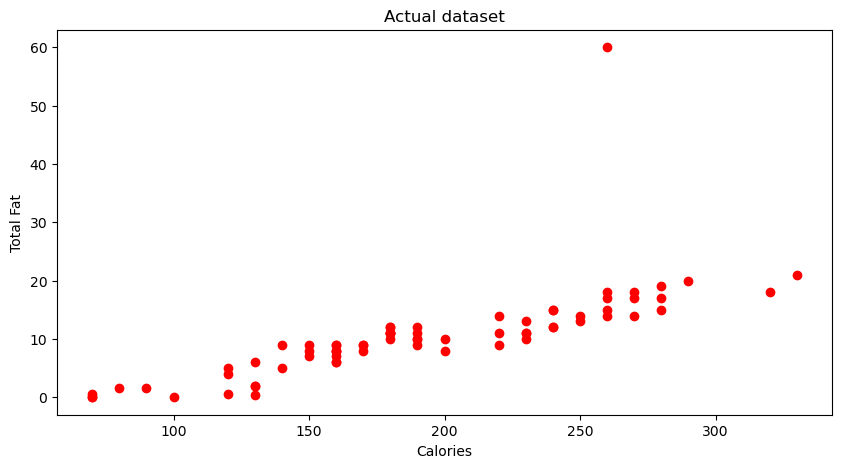

In [28]:
#Before Clustering

plt.figure(figsize=(10, 5))
plt.scatter(x=icecreamdf['Calories'], y=icecreamdf['Total Fat (g)'], color='red')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Actual dataset")
plt.show()

# Weak co-relation between the two variables is shown.

Text(0.5, 1.0, 'Post-clustering dataset')

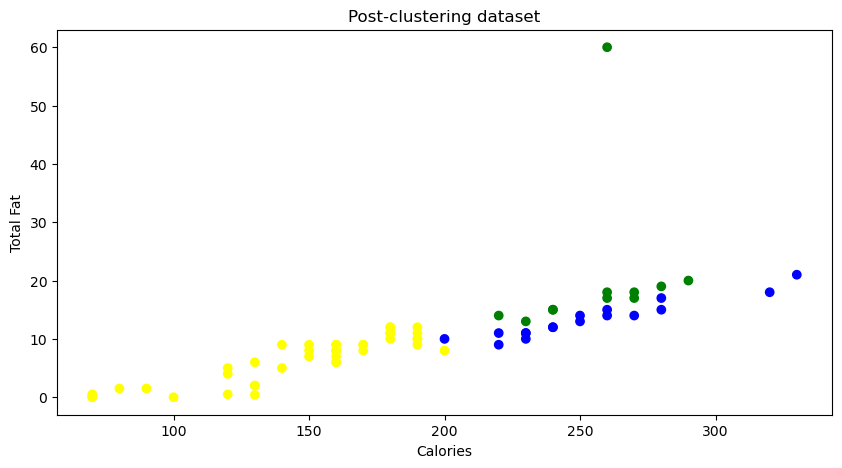

In [30]:
#After the clustering

plt.figure(figsize=(10, 5))
color2=np.array(['green','yellow','blue'])
plt.scatter(x=icecreamdf['Calories'],y=icecreamdf['Total Fat (g)'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Post-clustering dataset")

In [ ]:
#### #Again weak correlation is shown between the variables (data is spreaded out) post-clustering as well.

In [32]:
# Another visual with centroids

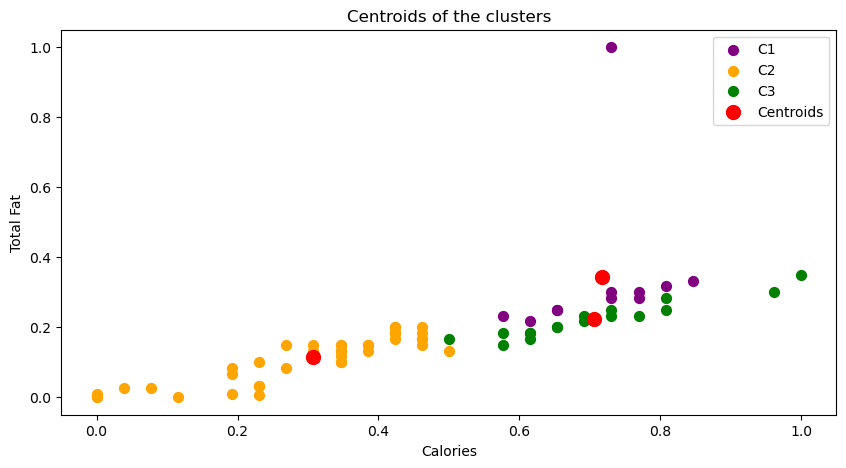

In [34]:
# Visualising the clusters
plt.figure(figsize=(10, 5))
plt.scatter(XS[Res == 0, 0], XS[Res == 0, 1], s=50, c='purple', label='C1')
plt.scatter(XS[Res == 1, 0], XS[Res == 1, 1], s=50, c='orange', label='C2')
plt.scatter(XS[Res == 2, 0], XS[Res == 2, 1], s=50, c='green', label='C3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Centroids of the clusters")
plt.legend()
plt.show()

##### The presented scatter plot depicts specific clusters, revealing three distinct clusters within the dataset. The values weakly encircle each cluster for every variable, indicating scattered and weak groupings.

In [36]:
#Q6

C1 = X.iloc[Res == 0, :]
C2 = X.iloc[Res == 1, :]
C3 = X.iloc[Res == 2, :]

In [38]:
C1

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
11,230,13.0,0.4,25,18,5.0
12,240,15.0,0.5,23,18,5.0
19,270,17.0,0.4,25,18,5.0
35,260,17.0,0.4,22,17,5.0
37,240,15.0,0.5,23,18,5.0
39,280,19.0,0.4,23,17,6.0
40,260,18.0,0.4,20,16,5.0
42,290,20.0,0.4,24,17,7.0
47,270,18.0,0.5,21,15,7.0
62,220,14.0,0.5,20,16,5.0


In [40]:
C2

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0
5,150,8.0,0.3,18,14,3.0
6,120,5.0,0.1,21,4,3.0
7,170,8.0,0.2,21,17,3.0
8,200,8.0,0.2,38,7,5.0
10,190,11.0,0.2,22,17,3.0


In [42]:
C3

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
9,220,11.0,0.4,26,19,4.0
13,280,15.0,0.5,31,23,5.0
15,280,17.0,0.4,29,20,5.0
20,240,12.0,0.4,31,20,4.0
25,240,12.0,0.4,30,23,4.0
27,320,18.0,0.4,36,28,4.0
28,260,15.0,0.4,28,20,5.0
29,260,14.0,0.4,29,24,4.0
34,230,10.0,0.4,29,24,4.0
36,230,11.0,0.2,30,22,6.0


In [44]:
#Q7
C1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,256.363636,20.545455,0.436364,22.818182,17.090909,5.454545
std,21.574396,13.261702,0.050452,1.887760,1.044466,0.820200
min,220.000000,13.000000,0.400000,20.000000,15.000000,5.000000
25%,240.000000,15.000000,0.400000,21.500000,16.500000,5.000000
50%,260.000000,17.000000,0.400000,23.000000,17.000000,5.000000
75%,270.000000,18.500000,0.500000,24.500000,18.000000,5.500000
max,290.000000,60.000000,0.500000,25.000000,18.000000,7.000000


##### The data from C1 specific to the above cluster shows a sample items with an average calorie count of 256.36 kcal. The calorie content ranges from 220 kcal to 290 kcal, with most items falling between 240 and 270 kcal, indicating a moderate spread in calorie levels across this dataset. The total fat content averages 20.54 g, with values ranging from 13 g to a maximum of 60 g, suggesting that one item has a particularly high fat content. On average, trans fat levels are low, with a mean of 0.44 g and a consistent distribution where most items have 0.4–0.5 g. The carbohydrate content is relatively stable, with a mean of 22.82 g, and values clustered between 20 g and 25 g. Sugars make up a considerable portion, averaging 17.09 g, and staying within a narrow range (15–18 g), indicating a fairly consistent sugar level across items.t.

In [46]:
C2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,149.761905,6.819048,0.190476,20.238095,14.571429,2.635714
std,36.122292,3.889275,0.118547,4.600157,3.527888,1.347956
min,70.000000,0.000000,0.000000,13.000000,4.000000,0.000000
25%,130.000000,4.250000,0.100000,17.000000,13.000000,2.000000
50%,160.000000,8.000000,0.200000,20.000000,15.000000,3.000000
75%,180.000000,9.750000,0.300000,21.000000,17.000000,3.000000
max,200.000000,12.000000,0.400000,38.000000,20.000000,6.000000


##### The data from C2, specific to this cluster contains items with an average calorie count of 149.76 kcal, showing a wider distribution from a low of 70 kcal to a high of 200 kcal. This suggests a diverse set of items, with varying energy content. Total fat content in this cluster is relatively low, with a mean of 6.82 g and values ranging from 0 g to 12 g, indicating that several items are either low-fat or fat-free. Trans fat levels are minimal, with an average of 0.19 g, and most items having between 0.1–0.3 g, making it a low trans fat dataset. Carbohydrate content is higher, averaging 20.24 g, with a broad range of 13–38 g, which reflects a variety of carbohydrate-rich items. Sugars average 14.57 g but show significant variation, ranging from 4 g to 20 g, suggesting that some items are low in sugar while others are quite sweet.

In [48]:
C3.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,253.529412,13.352941,0.388235,29.529412,22.588235,4.647059
std,34.630401,3.180825,0.060025,2.527787,2.450990,1.057188
min,200.000000,9.000000,0.200000,24.000000,19.000000,4.000000
25%,230.000000,11.000000,0.400000,29.000000,20.000000,4.000000
50%,250.000000,13.000000,0.400000,30.000000,23.000000,4.000000
75%,270.000000,15.000000,0.400000,30.000000,24.000000,5.000000
max,330.000000,21.000000,0.500000,36.000000,28.000000,8.000000


##### The data from this cluster, specific to C3, appears to consist of calorie-dense items with moderate to high carbohydrate and sugar levels, along with a reasonable amount of fat and protein, suggesting that these items could provide substantial energy and macronutrients.

In [50]:
calories = [C1['Calories'].mean(), C2['Calories'].mean(), C3['Calories'].mean()]
print("Mean Calories = ", calories)

Mean Calories =  [256.3636363636364, 149.76190476190476, 253.52941176470588]


#### The output provides insights into the caloric distribution across three clusters in the dataset. Cluster 1 (C1) exhibits the highest average calorie content at approximately 256.36, followed closely by Cluster 3 (C3) with a mean value of around 253.52. In contrast, items in Cluster 2 (C2) have a significantly lower average calorie content, approximately 149.761. This variation suggests distinct caloric profiles among the clusters, offering valuable information for dietary analysis. The lower average calorie content in Cluster 2 indicates a potential subgroup of items  that are comparatively lower in calories compared to those in Clusters 1 and 3. and 2.

In [52]:
TotalFat = [C1['Total Fat (g)'].mean(), C2['Total Fat (g)'].mean(), C3['Total Fat (g)'].mean()]
print("Total Mean Fat = ", TotalFat)

Total Mean Fat =  [20.545454545454547, 6.819047619047619, 13.352941176470589]


##### The output provides insights into the mean Total Fat content across three clusters in the dataset. Cluster 1 (C1) exhibits the highest mean average Total Fat content at approximately 20.54, while Cluster 3 (C3) has a total mean fat of 13.35. In contrast, Cluster 2 (C2) has the lowest mean Total Fat content among the clusters, with a value of 6.8. These variations highlight distinct Total Fat profiles within the dataset, offering valuable information for dietary analysis or menu planning.n and 3.

In [54]:
Carbohydrates = [C1['Carbohydrates (g)'].mean(), C2['Carbohydrates (g)'].mean(), C3['Carbohydrates (g)'].mean()]
print("Total Mean Carbohydrates = ", Carbohydrates)

Total Mean Carbohydrates =  [22.818181818181817, 20.238095238095237, 29.529411764705884]


##### The output Total Mean Carbohydrates unveils distinct carbohydrate profiles across three clusters (C1, C2, and C3) in the dataset. Cluster 3 boasts the highest mean carbohydrate content at 29.52, suggesting a focus on items rich in carbohydrates like grains or sugars. Cluster 1 falls in the middle with a mean carbohydrate value of 22.81, indicating a balanced or intermediate level of carbohydrate content in its items. Cluster 3 exhibits the lowest mean carbohydrate content at 20.23, implying a focus on items that are less reliant on carbohydrates. This analysis provides valuable insights for dietary understanding and menu planning, highlighting the diversity in carbohydrate emphasis among the different clusters.sters.

<Axes: xlabel='Calories', ylabel='Count'>

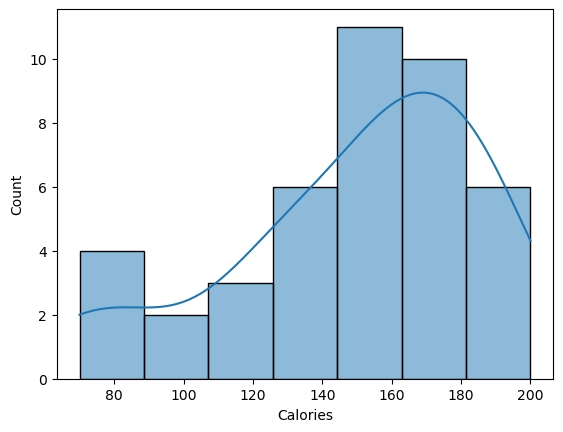

In [56]:
sns.histplot(C2['Calories'], kde=True)

<Axes: xlabel='Sugars (g)', ylabel='Count'>

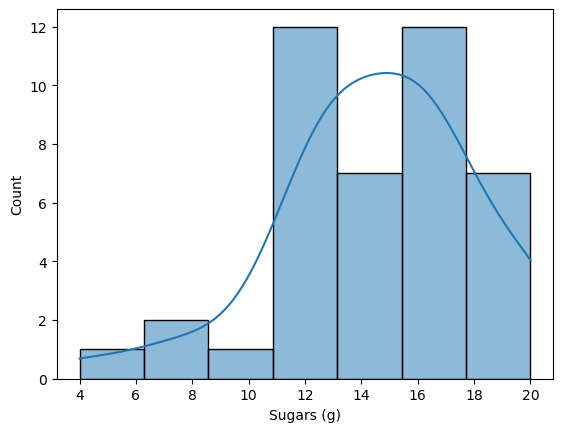

In [58]:
sns.histplot(C2['Sugars (g)'], kde=True)

<Axes: xlabel='Protein (g)', ylabel='Count'>

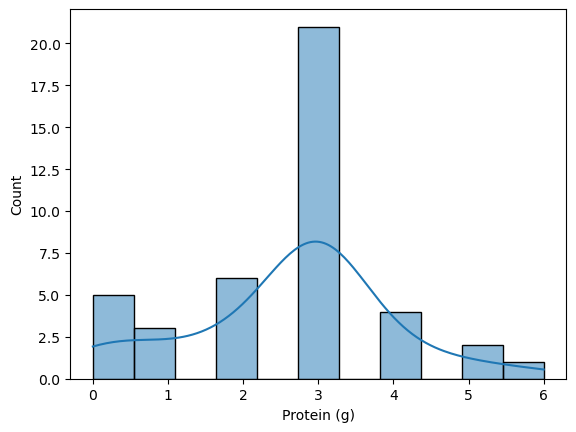

In [60]:
sns.histplot(C2['Protein (g)'], kde=True)

<Axes: xlabel='Calories', ylabel='Count'>

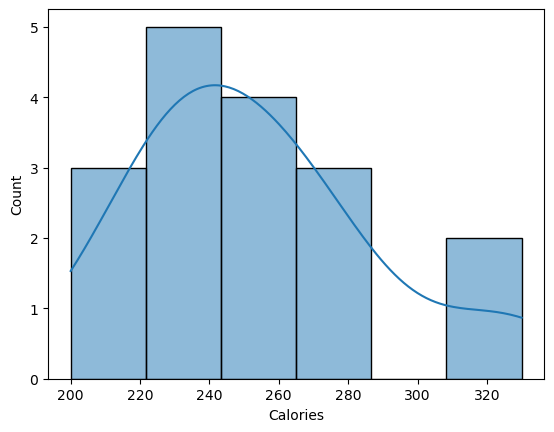

In [62]:
sns.histplot(C3['Calories'], kde=True)

<Axes: xlabel='Sugars (g)', ylabel='Count'>

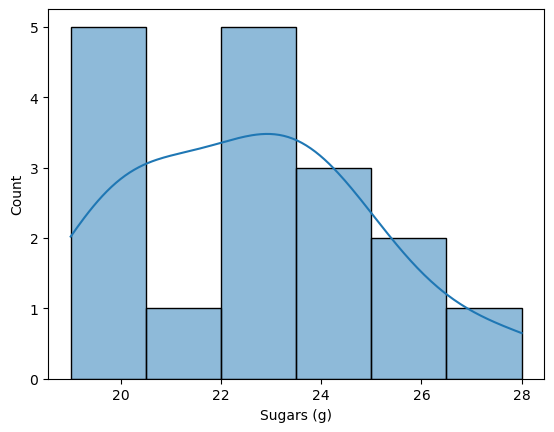

In [64]:
sns.histplot(C3['Sugars (g)'], kde=True)

<Axes: xlabel='Protein (g)', ylabel='Count'>

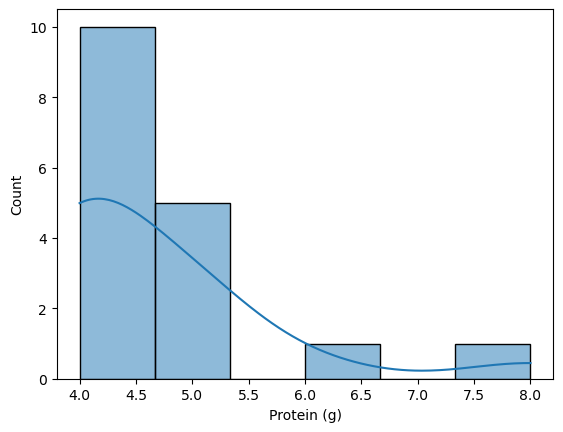

In [66]:
sns.histplot(C3['Protein (g)'], kde=True)

In [ ]:
# Q9
#Cluster 1: Caloric Beasters (High Calories)
#Cluster 2: SugarLover (high sugar level)
#Cluster 3: Low Fat Myths (Low Fat)